In [2]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [50]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualizations
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


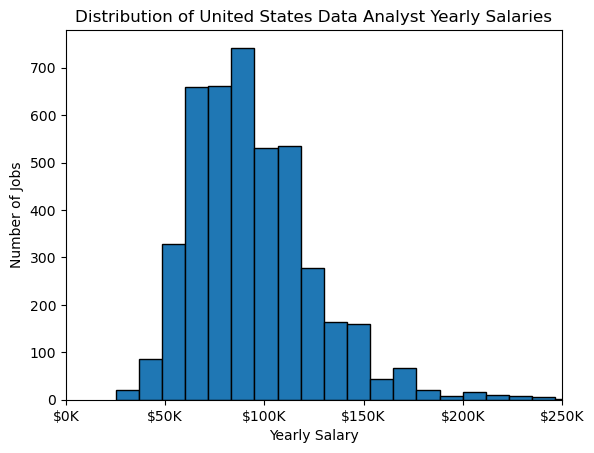

In [53]:
# Plot histogram for yearly average salary
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

# Problems

In [55]:
# Data Scientist Hourly Salaries
df_DS = df[df['job_title_short'] == 'Data Scientist']
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
448,Data Scientist,Jnr Data Scientist for exciting projects with ...,Anywhere,via Upwork,Full-time,True,Sudan,2023-05-26 13:40:09,False,False,Sudan,hour,NaN,9.500000,Upwork,"[r, python, aws, azure, tidyverse, excel, powe...","{'analyst_tools': ['excel', 'powerpoint'], 'cl..."
734,Data Scientist,"Data Scientist - NLP, regex, OpenCV, Python, A...",Anywhere,via Upwork,Contractor,True,"Illinois, United States",2023-04-23 13:04:21,False,False,United States,hour,NaN,15.000000,Upwork,"[python, aws]","{'cloud': ['aws'], 'programming': ['python']}"
881,Data Scientist,Data Scientist with expertise in deep learning...,Anywhere,via Upwork,Contractor,True,"Texas, United States",2023-07-02 13:05:15,False,False,United States,hour,NaN,35.500000,Upwork,None,None
1100,Data Scientist,"Data Scientist - R, Python","Tallahassee, FL",via Dice,Contractor,False,Georgia,2023-11-21 14:40:41,False,False,United States,hour,NaN,67.500000,"ArnAmy, Inc.","[python, r, sql, azure, pandas, hadoop, spark]","{'cloud': ['azure'], 'libraries': ['pandas', '..."
1382,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Contractor,True,Sudan,2023-08-07 14:28:43,False,False,Sudan,hour,NaN,115.000000,Insight Global,"[python, r, sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['py..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783522,Data Scientist,Data Scientist,"Los Angeles, CA",via LinkedIn,Contractor,False,"California, United States",2023-01-19 06:05:26,False,False,United States,hour,NaN,85.000000,"iSpace, Inc.","[python, aws]","{'cloud': ['aws'], 'programming': ['python']}"
783753,Data Scientist,Data Scientist 3 - Full-time / Part-time,"Augusta, GA",via Snagajob,Full-time and Part-time,False,Georgia,2023-10-13 07:18:54,False,False,United States,hour,NaN,31.974998,iNovex Information Systems,"[c, shell, bash, python, perl]","{'programming': ['c', 'shell', 'bash', 'python..."
783976,Data Scientist,Data Scientist - Contract to Hire,Anywhere,via Upwork,Contractor and Temp work,True,Sudan,2023-09-17 06:13:28,False,False,Sudan,hour,NaN,22.500000,Upwork,[azure],{'cloud': ['azure']}
785476,Data Scientist,"Data Scientist, Lead","Washington, DC",via Snagajob,Full-time and Part-time,False,Georgia,2023-11-01 06:58:10,False,True,United States,hour,NaN,47.620003,Booz Allen Hamilton,"[databricks, azure, aws]","{'cloud': ['databricks', 'azure', 'aws']}"


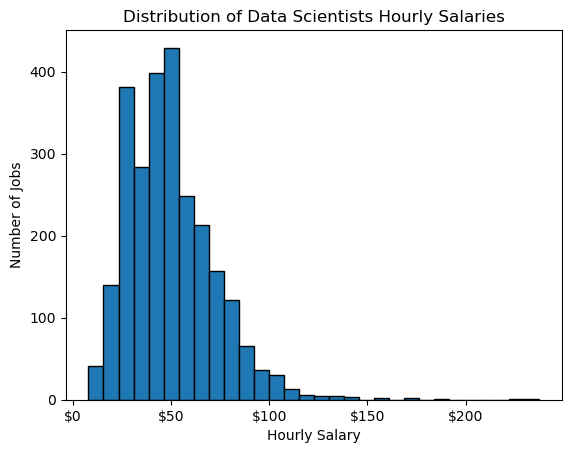

In [58]:
df_DS['salary_hour_avg'].plot(kind='hist', bins=30, edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))

plt.title('Distribution of Data Scientists Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

In [68]:
# Job Postings by Number of Skills
df_copy = df.copy()
df_copy['num_skills'] = df_copy['job_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_copy

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,num_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,0
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",6
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",9
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",8
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete...",8
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi...",4
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}",2
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",17


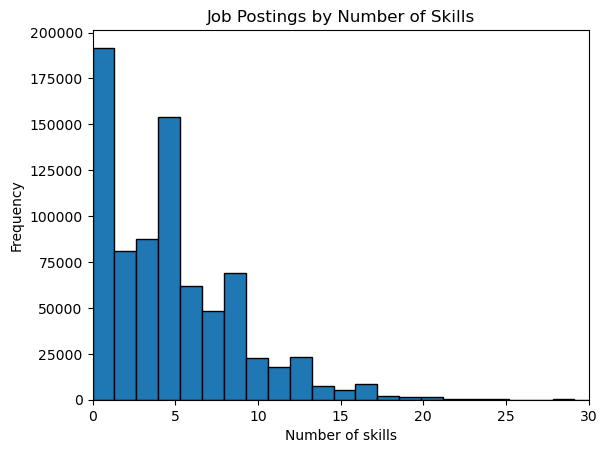

In [74]:
df_copy['num_skills'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 30)

plt.title('Job Postings by Number of Skills')
plt.xlabel('Number of skills')
plt.ylabel('Frequency')
plt.show()

In [76]:
# Data Engineer Salaries
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

df_DE = df_DE.dropna(subset=['salary_year_avg'])

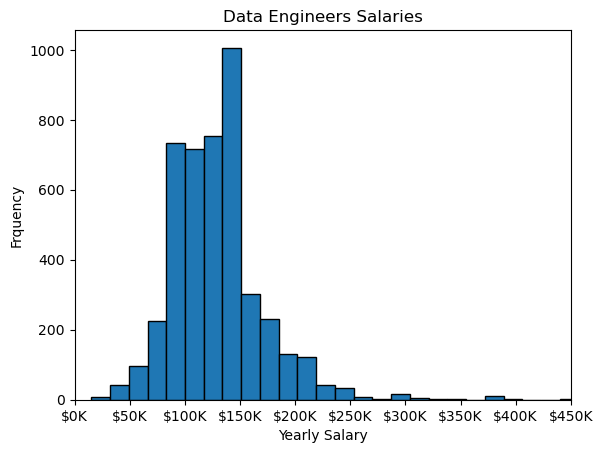

In [79]:
df_DE['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 450000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Data Engineers Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Frquency')
plt.show()